In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
mushroom_df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

In [7]:
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
mushroom_df.shape

(8124, 23)

In [9]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# We have two unique classes, edible and poisionous denoted "e" and "p" in the class column
# Thought: Every mushroom has veil-type "p" so can disregard that column for this set

In [10]:
# Playing around with different views of data, thought: odor = chemical = class componenet
mushroom_df.groupby(['class', 'odor']).count()

cap-shape  cap-surface  cap-color  bruises  gill-attachment  \
class odor                                                                
e     a           400          400        400      400              400   
      l           400          400        400      400              400   
      n          3408         3408       3408     3408             3408   
p     c           192          192        192      192              192   
      f          2160         2160       2160     2160             2160   
      m            36           36         36       36               36   
      n           120          120        120      120              120   
      p           256          256        256      256              256   
      s           576          576        576      576              576   
      y           576          576        576      576              576   

            gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  ...  \
class odor                                                                ...   
e     a              400        400         400          400         400  ...   
      l              400        400         400          400         400  ...   
      n             3408       3408        3408         3408        3408  ...   
p     c              192        192         192          192         192  ...   
      f             2160       2160        2160         2160        2160  ...   
      m               36         36          36           36          36  ...   
      n              120        120         120          120         120  ...   
      p              256        256         256          256         256  ...   
      s              576        576         576          576         576  ...   
      y              576        576         576          576         576  ...   

            stalk-surface-below-ring  stalk-color-above-ring  \
class odor                                                     
e     a                          400                     400   
      l                          400                     400   
      n                         3408                    3408   
p     c                          192                     192   
      f                         2160                    2160   
      m                           36                      36   
      n                          120                     120   
      p                          256                     256   
      s                          576                     576   
      y                          576                     576   

            stalk-color-below-ring  veil-type  veil-color  ring-number  \
class odor                                                               
e     a                        400        400         400          400   
      l                        400        400         400          400   
      n                       3408       3408        3408         3408   
p     c                        192        192         192          192   
      f                       2160       2160        2160         2160   
      m                         36         36          36           36   
      n                        120        120         120          120   
      p                        256        256         256          256   
      s                        576        576         576          576   
      y                        576        576         576          576   

            ring-type  spore-print-color  population  habitat  
class odor                                                     
e     a           400                400         400      400  
      l           400                400         400      400  
      n          3408               3408        3408     3408  
p     c           192                192         192      192  
      f          2160               2160        2160     2160  
      m            36           

In [11]:
# From the above we see that we only have data on edible mushrooms in three odor types: a, l, n.
# the only overlapping class between the two is the "n" odor class.
# Preparing to feed Algorithm:
labels = mushroom_df['class']
features = mushroom_df.drop(columns=['class'])

In [12]:
print(labels[0:5:1])

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


In [13]:
labels.replace('p',0,inplace=True)
labels.replace('e',1, inplace=True)
# Poison Will be equal to zero and edible will be equal to 1

In [14]:
labels[0:5:1]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [15]:
features[0:5:1]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [16]:
#convert features to values between 0 & 1
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')
print(features[0:2])
print(labels[0:2])
print(len(features[0]))

[[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[0. 1.]
117


In [18]:
# split our dataset
features_train, features_test, labels_train, labels_test=train_test_split(features,labels,test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features,labels,test_size=0.2)

Softmax

In [28]:
# Creating our Model
model=keras.Sequential([keras.layers.Dense(32,input_shape=(117,)),
                        keras.layers.Dense(20,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='softmax')])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
history = model.fit(features_train,labels_train,epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
204/204 [==============================] - 1s 4ms/step - loss: 0.1127 - acc: 0.9654 - val_loss: 0.0162 - val_acc: 0.9988
Epoch 2/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0072 - acc: 0.9997 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 3/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 4/20
204/204 [==============================] - 1s 3ms/step - loss: 9.8628e-04 - acc: 1.0000 - val_loss: 9.6932e-04 - val_acc: 1.0000
Epoch 5/20
204/204 [==============================] - 0s 2ms/step - loss: 5.3411e-04 - acc: 1.0000 - val_loss: 7.3055e-04 - val_acc: 1.0000
Epoch 6/20
204/204 [==============================] - 0s 2ms/step - loss: 3.5357e-04 - acc: 1.0000 - val_loss: 4.7880e-04 - val_acc: 1.0000
Epoch 7/20
204/204 [==============================] - 0s 2ms/step - loss: 2.3754e-04 - acc: 1.0000 - val_loss: 3.7200e-04 - val_acc: 1.0000
Epoch 8/20
204/204 [========================

In [31]:
prediction_features=model.predict(features_test)
performance=model.evaluate(features_test,labels_test)
print(performance)

51/51 [==============================] - 0s 1ms/step - loss: 3.1250e-05 - acc: 1.0000
[3.1249586754711345e-05, 1.0]


In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

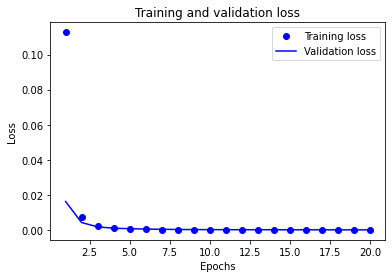

In [33]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tanh

In [47]:
# Creating our Model
model=keras.Sequential([keras.layers.Dense(32,input_shape=(117,)),
                        keras.layers.Dense(20,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='tanh')])

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
history = model.fit(features_train,labels_train,epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
204/204 [==============================] - 1s 3ms/step - loss: 0.6162 - acc: 0.9305 - val_loss: 0.1162 - val_acc: 0.9852
Epoch 2/20
204/204 [==============================] - 0s 2ms/step - loss: 0.1415 - acc: 0.9748 - val_loss: 0.1591 - val_acc: 0.9692
Epoch 3/20
204/204 [==============================] - 0s 2ms/step - loss: 0.1412 - acc: 0.9706 - val_loss: 0.1514 - val_acc: 0.9711
Epoch 4/20
204/204 [==============================] - 0s 2ms/step - loss: 0.1365 - acc: 0.9729 - val_loss: 0.1408 - val_acc: 0.9735
Epoch 5/20
204/204 [==============================] - 0s 2ms/step - loss: 0.1218 - acc: 0.9768 - val_loss: 0.1254 - val_acc: 0.9772
Epoch 6/20
204/204 [==============================] - 1s 3ms/step - loss: 0.1897 - acc: 0.9485 - val_loss: 0.2997 - val_acc: 0.9342
Epoch 7/20
204/204 [==============================] - 0s 2ms/step - loss: 0.3117 - acc: 0.9571 - val_loss: 0.2884 - val_acc: 0.9606
Epoch 8/20
204/204 [==============================] - 0s 2ms/step - loss: 0.

In [52]:
prediction_features=model.predict(features_test)
performance=model.evaluate(features_test,labels_test)
print(performance)

51/51 [==============================] - 0s 1ms/step - loss: 0.2248 - acc: 0.9662
[0.22479355335235596, 0.9661538600921631]


In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

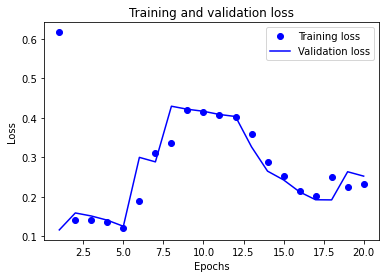

In [54]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

RELU

In [55]:
# Creating our Model
model=keras.Sequential([keras.layers.Dense(32,input_shape=(117,)),
                        keras.layers.Dense(20,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='relu')])

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [57]:
history = model.fit(features_train,labels_train,epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
204/204 [==============================] - 1s 3ms/step - loss: 0.7053 - acc: 0.5821 - val_loss: 0.6160 - val_acc: 0.5428
Epoch 2/20
204/204 [==============================] - 0s 2ms/step - loss: 0.6097 - acc: 0.5896 - val_loss: 0.4911 - val_acc: 0.8055
Epoch 3/20
204/204 [==============================] - 0s 2ms/step - loss: 0.4666 - acc: 0.7370 - val_loss: 0.4786 - val_acc: 0.7268
Epoch 4/20
204/204 [==============================] - 1s 3ms/step - loss: 0.4766 - acc: 0.7240 - val_loss: 0.4748 - val_acc: 0.7268
Epoch 5/20
204/204 [==============================] - 0s 2ms/step - loss: 0.3893 - acc: 0.7352 - val_loss: 0.3214 - val_acc: 0.7428
Epoch 6/20
204/204 [==============================] - 0s 2ms/step - loss: 0.2974 - acc: 0.7623 - val_loss: 0.2900 - val_acc: 0.7889
Epoch 7/20
204/204 [==============================] - 0s 2ms/step - loss: 0.2702 - acc: 0.7881 - val_loss: 0.2871 - val_acc: 0.7754
Epoch 8/20
204/204 [==============================] - 0s 2ms/step - loss: 0.

In [58]:
prediction_features=model.predict(features_test)
performance=model.evaluate(features_test,labels_test)
print(performance)

51/51 [==============================] - 0s 2ms/step - loss: 0.1864 - acc: 0.7852
[0.1864037960767746, 0.7852307558059692]


In [59]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

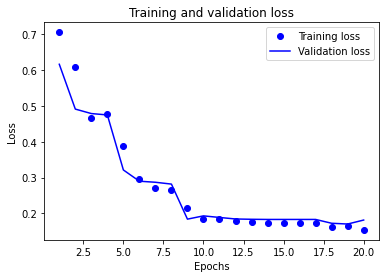

In [60]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Sigmoid

In [61]:
# Creating our Model
model=keras.Sequential([keras.layers.Dense(32,input_shape=(117,)),
                        keras.layers.Dense(20,activation=tf.nn.relu),
                        keras.layers.Dense(2,activation='sigmoid')])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [63]:
history = model.fit(features_train,labels_train,epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
204/204 [==============================] - 1s 3ms/step - loss: 0.1379 - acc: 0.9577 - val_loss: 0.0173 - val_acc: 0.9982
Epoch 2/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0083 - acc: 0.9992 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 3/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 4/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 5/20
204/204 [==============================] - 1s 3ms/step - loss: 5.7174e-04 - acc: 1.0000 - val_loss: 7.0071e-04 - val_acc: 1.0000
Epoch 6/20
204/204 [==============================] - 0s 2ms/step - loss: 3.6283e-04 - acc: 1.0000 - val_loss: 4.8519e-04 - val_acc: 1.0000
Epoch 7/20
204/204 [==============================] - 0s 2ms/step - loss: 2.4913e-04 - acc: 1.0000 - val_loss: 3.4557e-04 - val_acc: 1.0000
Epoch 8/20
204/204 [==============================] 

In [64]:
prediction_features=model.predict(features_test)
performance=model.evaluate(features_test,labels_test)
print(performance)

51/51 [==============================] - 0s 1ms/step - loss: 2.7029e-05 - acc: 1.0000
[2.702933306863997e-05, 1.0]


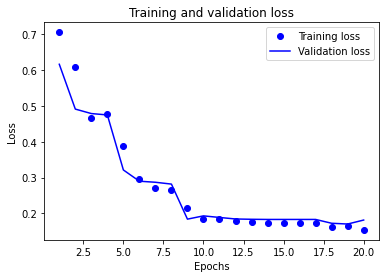

In [65]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()